## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 0:30** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [ ]:
data = pd.read_csv('./diabetes.csv')

In [ ]:
data.isnull().any().any()

False

Вывод: в данных пропусков нет.

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Из описания датасета можно сделать вывод, что пропущенные значения могут иметь только первые шесть признаков (так как минимальные значения DiabetesPedigreeFunction и Age больше нуля), поэтому на наличие пропущенных значений нужно проанализировать столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin и BMI.	

Согласно описанию признаков: \\
1) Pregnancies - сколько раз женщина была беременна \\
2) Glucose - концентрация глюкозы в плазме спустя 2 часа после тестирования на толерантность к глюкозе \\
3) BloodPressure - диастолическое артериальное давление \\
4) SkinThickness - толщина трицепса \\
5) Insulin - 2-часовой сывороточный инсулин \\
6) BMI - body mass index, индекс массы тела

Признаки 2 - 6 не могут принимать нулевое значение (особенности предметной области), поэтому они имеют пропущенные значения, которые можно заменить средними значениями. Признак Pregnancies, напротив, может принимать нулевое значение, поэтому значения этого столбца не нужно изменять.

In [ ]:
data.Glucose.replace(data.Glucose[data.Glucose == 0], data.Glucose.mean(), inplace=True)
data.BloodPressure.replace(data.BloodPressure[data.BloodPressure == 0], data.BloodPressure.mean(), inplace=True)
data.SkinThickness.replace(data.SkinThickness[data.SkinThickness == 0], data.SkinThickness.mean(), inplace=True)
data.Insulin.replace(data.Insulin[data.Insulin == 0], data.Insulin.mean(), inplace=True)
data.BMI.replace(data.BMI[data.BMI == 0], data.BMI.mean(), inplace=True)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Все пропущенные значения были заменены, теперь минимальные значения всех признаков (кроме Pregnancies) больше нуля.

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

In [ ]:
features = [['Pregnancies', 'Glucose', 'BloodPressure'],
            ['SkinThickness', 'Insulin', 'BMI'],
            ['DiabetesPedigreeFunction', 'Age', 'Outcome']]

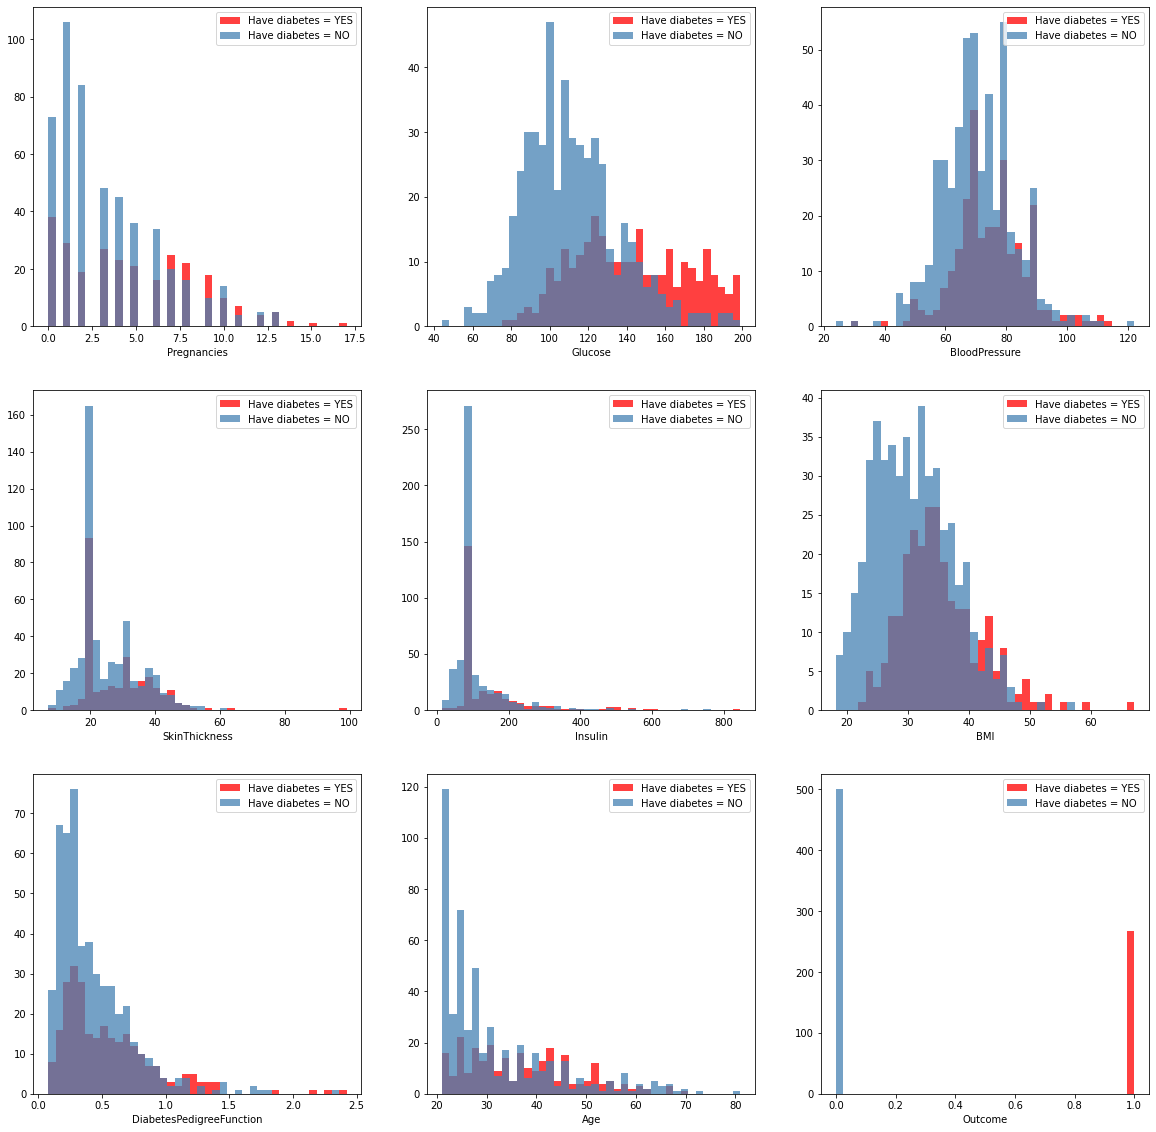

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for i in range(3):
  for j in range(3):
    hlpstrng = features[i][j] 
    x1 = list(data[hlpstrng][data.Outcome == 0])
    x2 = list(data[hlpstrng][data.Outcome == 1])
  
    colors = ['steelblue', 'red']
    names = ['Have diabetes = NO', 'Have diabetes = YES']
         
    ax[i][j].hist([x1, x2], bins = 40, histtype='stepfilled', alpha = 0.75, color = colors, label=names)

    ax[i][j].legend()
    ax[i][j].set(xlabel = '{}'.format(features[i][j]))

plt.show()

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
def metrics(y_test, y_pred, classif):
  print(classif)
  print('Accuracy: ', accuracy_score(y_test, y_pred))
  print('Recall: ', precision_score(y_test, y_pred))
  print('Precision: ', recall_score(y_test, y_pred))

In [ ]:
X = data[data.columns[:-1]].to_numpy()

In [ ]:
y = data[data.columns[-1:]].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tr_class = DecisionTreeClassifier()
bagg_class_dec_tr = BaggingClassifier(base_estimator=dec_tr_class,
                         n_estimators=10).fit(X_train, y_train.ravel())

metrics(y_test, bagg_class_dec_tr.predict(X_test), 'BaggingClassifier, base_estimator is DecisionTreeClassifier')                      

BaggingClassifier, base_estimator is DecisionTreeClassifier
Accuracy:  0.7186147186147186
Recall:  0.6268656716417911
Precision:  0.5121951219512195


In [ ]:
rand_for_class = RandomForestClassifier(n_estimators=10).fit(X_train, y_train.ravel())

metrics(y_test, rand_for_class.predict(X_test), 'RandomForestClassifier')                      

RandomForestClassifier
Accuracy:  0.7012987012987013
Recall:  0.6440677966101694
Precision:  0.4418604651162791


Обе модели используют бутстрап, то есть разбиение с возвращением обучающей выборки на случайные помножества. Отличие моделей заключается в том, что в вершине каждого дерева случайного леса разбиение подвыборки происходит по наилучшему признаку из случайного подмножества признаков, а в бэггинге - по всем признакам. (случайные признаки выбираются заново для каждого разбиения) \\

Результат: \\
BaggingClassifier оказался лучше по всем трем метрикам по сравнению с RandomForest, хотя  полученные результаты отличаются несильно (accuracy первой модели больше второй на 4%, recall - на 6%, precision - на 17%) \\

Такой результат мог получиться из - за небольшого количества датасета (768 объектов и 8 признаков) - рандомизация по признакам в модели случайного леса оказалась неэффективным решением. Также могло иметь значение число деревьев в композиции (при большем числе деревьев качество должно повыситься).

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [ ]:
from sklearn.metrics import roc_auc_score

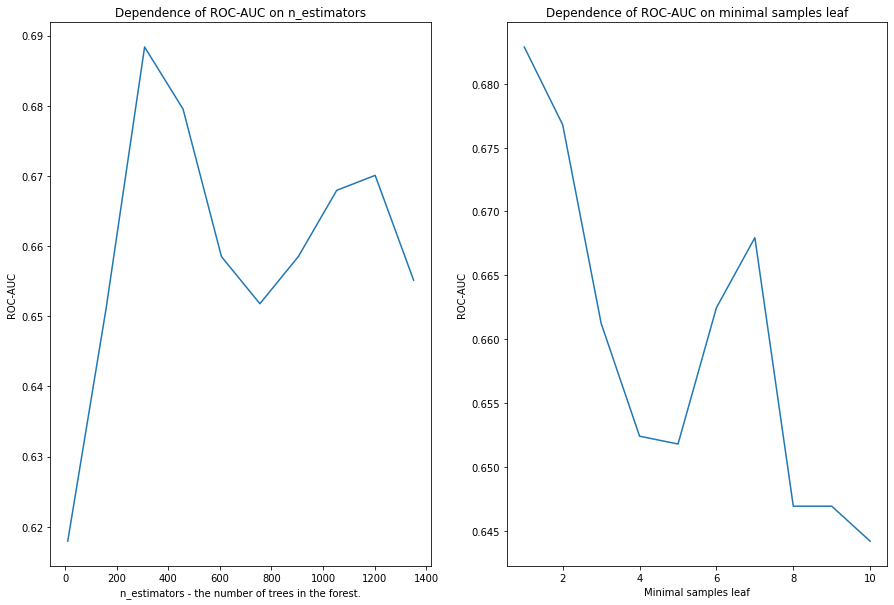

In [ ]:
n_est_array = []
roc_auc_nest = []
min_samp_l_array = []
roc_auc_msl = []

fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=False, figsize=(15,10))

for n_est in range(10, 1500, 149):
  rand_for_class_r = RandomForestClassifier(n_estimators=n_est).fit(X_train, y_train.ravel())
  n_est_array.append(n_est)
  roc_auc_nest.append(roc_auc_score(y_test, rand_for_class_r.predict(X_test)))

ax[0][0].plot(np.array(n_est_array), np.array(roc_auc_nest))
ax[0][0].set_title('Dependence of ROC-AUC on n_estimators')
ax[0][0].set_xlabel('n_estimators - the number of trees in the forest.')
ax[0][0].set_ylabel('ROC-AUC')

for min_samp_l in range(1, 11):
  rand_for_class_r = RandomForestClassifier(min_samples_leaf=min_samp_l).fit(X_train, y_train.ravel())
  min_samp_l_array.append(min_samp_l)
  roc_auc_msl.append(roc_auc_score(y_test, rand_for_class_r.predict(X_test)))

ax[0][1].plot(np.array(min_samp_l_array), np.array(roc_auc_msl))
ax[0][1].set_title('Dependence of ROC-AUC on minimal samples leaf')
ax[0][1].set_xlabel('Minimal samples leaf')
ax[0][1].set_ylabel('ROC-AUC')

plt.show()

Результат: качество классификатора (определяемое по AUC-ROC) увеличивается при увеличении числа деревьев и достигает максимального значения 0.69 при 457  деревьях в композиции. При изменении минимального числа объектов в листовой вершине качество падает, максимальное значение качества при изменении этого параметра = 0.68.

Можно сделать выводы: \\
1) Не нужно строить слишком много деревьев, поскольку и при самых больших значениях n_estimators, и при средних (400 - 800) качество почти не меняется.

2) Как следствие пункта 1 - модель не переобучается при увеличении числа деревьев, так как качество почти не меняется.

2) Наилучшее качество получилось при min_samples_leaf = 1, что соответствует теоретическим результатам (в задачах классификации случайным лесом рекомендуется строить деревья до тех пор, пока не останется по одному объекту в каждом листе)

При этом качество изменяется несильно при изменении каждого из параметров (разница между максимальным и минимальным значениями AUC-ROC для параметра n_estimators около 9%, для параметра min_samples_leaf около 5%).

Значения n_estimators выбирались из условия принадлежности значений отрезку [10, 1500] - были проверены ровно 10 значений из этого отрезка, равномерно распределенных по нему. Соответственно, были проверены 10 первых значений параметра min_samples_leaf (10 - ради равномерности графика, только первые значения - так как в задачах классификации случайным лесом рекомендуется строить деревья до тех пор, пока не останется по одному объекту в каждом листе).

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

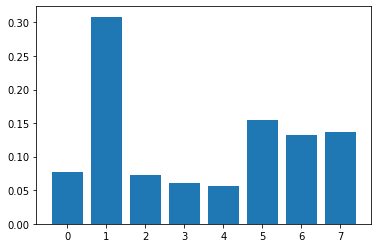

In [ ]:
rand_for_class = RandomForestClassifier(n_estimators=500, min_samples_leaf=5).fit(X_train, y_train.ravel())
feat_imp = rand_for_class.feature_importances_
plt.bar(range(8), feat_imp)
plt.show()

In [ ]:
pd.DataFrame({'feature': data.columns[:-1], 'importance': feat_imp})

,feature,importance
0,Pregnancies,0.080131
1,Glucose,0.310583
2,BloodPressure,0.074064
3,SkinThickness,0.058147
4,Insulin,0.054774
5,BMI,0.160303
6,DiabetesPedigreeFunction,0.123617
7,Age,0.138380


Можно сделать вывод, что наибольшую важность имеют признаки Glucose, BMI, Age  и DiabetesPedigreeFunction, что соответствует реальности (эти показатели важнее при определении диабета).

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier

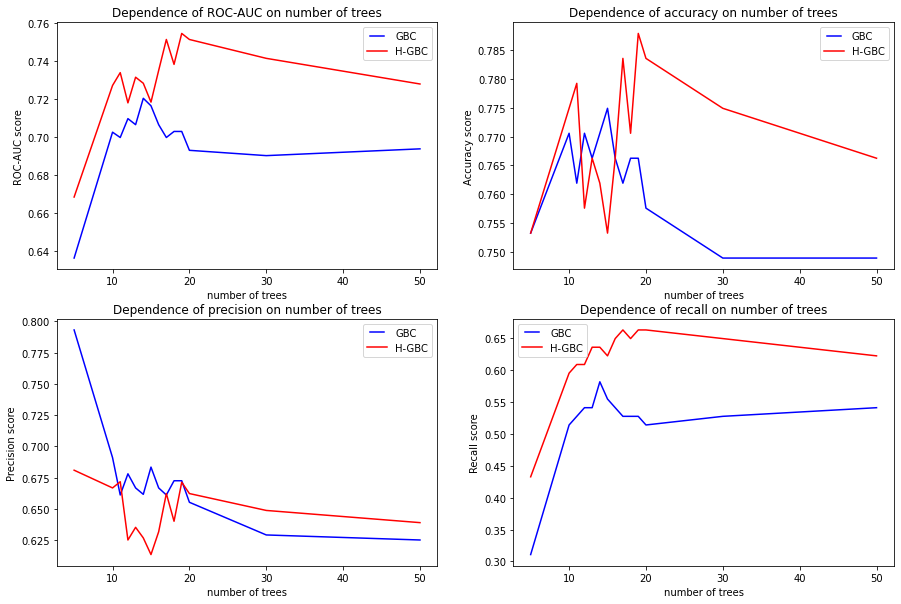

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
fig, a = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(15,10))

roc_auc_gbc = []
roc_auc_hgbc = []
acc_gbc = []
acc_hgbc = []
precision_gbc = []
precision_hgbc = []
recall_gbc = []
recall_hgbc = []

number_of_trees = [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 50]

for tr in number_of_trees:
  grad_boost_class = GradientBoostingClassifier(n_estimators=tr).fit(X_train, y_train.ravel())
  roc_auc_gbc.append(roc_auc_score(y_test, grad_boost_class.predict(X_test)))
  acc_gbc.append(accuracy_score(y_test, grad_boost_class.predict(X_test)))
  precision_gbc.append(precision_score(y_test, grad_boost_class.predict(X_test)))
  recall_gbc.append(recall_score(y_test, grad_boost_class.predict(X_test)))

  h_grad_boost_class = HistGradientBoostingClassifier(max_iter=tr).fit(X_train, y_train.ravel())
  roc_auc_hgbc.append(roc_auc_score(y_test, h_grad_boost_class.predict(X_test)))
  acc_hgbc.append(accuracy_score(y_test, h_grad_boost_class.predict(X_test)))
  precision_hgbc.append(precision_score(y_test, h_grad_boost_class.predict(X_test)))
  recall_hgbc.append(recall_score(y_test, h_grad_boost_class.predict(X_test)))

line1, = a[0][0].plot(number_of_trees, roc_auc_gbc, 'b', label='GBC')
line2, = a[0][0].plot(number_of_trees, roc_auc_hgbc, 'r', label='H-GBC')
a[0][0].legend(handler_map={line1: HandlerLine2D(numpoints=2)})
a[0][0].set_title('Dependence of ROC-AUC on number of trees')
a[0][0].set_ylabel('ROC-AUC score')
a[0][0].set_xlabel('number of trees')

line1, = a[0][1].plot(number_of_trees, acc_gbc, 'b', label='GBC')
line2, = a[0][1].plot(number_of_trees, acc_hgbc, 'r', label='H-GBC')
a[0][1].legend(handler_map={line1: HandlerLine2D(numpoints=2)})
a[0][1].set_title('Dependence of accuracy on number of trees')
a[0][1].set_ylabel('Accuracy score')
a[0][1].set_xlabel('number of trees')

line1, = a[1][0].plot(number_of_trees, precision_gbc, 'b', label='GBC')
line2, = a[1][0].plot(number_of_trees, precision_hgbc, 'r', label='H-GBC')
a[1][0].legend(handler_map={line1: HandlerLine2D(numpoints=2)})
a[1][0].set_title('Dependence of precision on number of trees')
a[1][0].set_ylabel('Precision score')
a[1][0].set_xlabel('number of trees')

line1, = a[1][1].plot(number_of_trees, recall_gbc, 'b', label='GBC')
line2, = a[1][1].plot(number_of_trees, recall_hgbc, 'r', label='H-GBC')
a[1][1].legend(handler_map={line1: HandlerLine2D(numpoints=2)})
a[1][1].set_title('Dependence of recall on number of trees')
a[1][1].set_ylabel('Recall score')
a[1][1].set_xlabel('number of trees')

plt.show()

Были выбраны небольшие значения числа деревьев, чтобы избежать переобучения. 

Наилучшее значения метрик качества получились при использовании HistGradientBoostingClassifier. Лучшая модель - при числе деревьев = 19: \\
ROC-AUC = 0.75 \\
Accuracy = 0.78 \\
Recall = 0.65 \\
Precision = 0.67 \\

Полученные метрики выше метрик предыдущих моделей: \\

1) BaggingClassifier (base_estimator = DecisionTreeClassifier), разница с HistGradientBoostingClassifier: \\
Accuracy:  0.72, 4% \\
Recall:  0.63,  3% \\
Precision:  0.51, 24% \\

2) RandomForestClassifier, разница с HistGradientBoostingClassifier: \\
Accuracy:  0.70, 7% \\
Recall:  0.65, 0% \\
Precision:  0.44, 34%

3) GradientBoostingClassifier при числе деревьев 19, разница с HistGradientBoostingClassifier: \\
ROC-AUC = 0.70, 7% \\
Accuracy = 0.76, 3% \\
Recall = 0.64,  2% \\
Precision = 0.67, 0% \\

Отличие HistGradientBoostingClassifier от GradientBoostingClassifier заключается в том, что в алгоритме HistGradientBoostingClassifier при построении дерева в каждой вершине перебираются не значения признаков, а значения гистограммы каждого признака. Из - за этого время построения модели значительно уменьшается. 

Также HistGradientBoostingClassifier умеет работать с пропущенными значениями (NaN): при обучении строится "missingness pattern", то есть при разбиении выборки алгоритм запоминает, куда (налево или направо) в дереве идут объекты с пропущенными значениями признаков. После этого разделение может быть выполнено исходя из того, отсутствует ли значение элемента или нет.

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  

In [ ]:
base_learners = [('h_gbc', HistGradientBoostingClassifier(max_iter=18)), ('SVC', SVC())]
st_cl1 = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())  
st_cl1.fit(X_train, y_train.ravel())
metrics(y_test, st_cl1.predict(X_test), '1 - Stacking Classifier with HistGBC and SVC')
print('ROC-AUC : ', roc_auc_score(y_test, st_cl1.predict(X_test)))
print()
base_learners = [('gbc', GradientBoostingClassifier(n_estimators=20)), ('SVC', SVC())]
st_cl2 = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())  
st_cl2.fit(X_train, y_train.ravel())
metrics(y_test, st_cl2.predict(X_test), '2 - Stacking Classifier with GBC and SVC')
print('ROC-AUC : ', roc_auc_score(y_test, st_cl2.predict(X_test)))
print()
base_learners = [('random_forest', RandomForestClassifier()), ('SVC', SVC())]
st_cl3 = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())  
st_cl3.fit(X_train, y_train.ravel())
metrics(y_test, st_cl3.predict(X_test), '3 - Stacking Classifier with RandomForestClassifier and SVC')
print('ROC-AUC : ', roc_auc_score(y_test, st_cl3.predict(X_test)))
print()
base_learners = [('bagg_cl', BaggingClassifier(base_estimator=DecisionTreeClassifier())), ('SVC', SVC())]
st_cl4 = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())  
st_cl4.fit(X_train, y_train.ravel())
metrics(y_test, st_cl4.predict(X_test), '4 - Stacking Classifier with BaggingClassifier (base estimator is DecisionTreeClassifier) and SVC')
print('ROC-AUC : ', roc_auc_score(y_test, st_cl4.predict(X_test)))

1 - Stacking Classifier with HistGBC and SVC
Accuracy:  0.7316017316017316
Recall:  0.7
Precision:  0.4268292682926829
ROC-AUC :  0.6630790636765428

2 - Stacking Classifier with GBC and SVC
Accuracy:  0.7359307359307359
Recall:  0.7333333333333333
Precision:  0.4024390243902439
ROC-AUC :  0.660951055819283

3 - Stacking Classifier with RandomForestClassifier and SVC
Accuracy:  0.7359307359307359
Recall:  0.7142857142857143
Precision:  0.4268292682926829
ROC-AUC :  0.6664347683745293

4 - Stacking Classifier with BaggingClassifier (base estimator is DecisionTreeClassifier) and SVC
Accuracy:  0.7402597402597403
Recall:  0.72
Precision:  0.43902439024390244
ROC-AUC :  0.6725323293501391


In [ ]:
base_learners = [('h_gbc', HistGradientBoostingClassifier(max_iter=18)), ('KNN', KNeighborsClassifier())]
st_cl5 = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())  
st_cl5.fit(X_train, y_train.ravel())
metrics(y_test, st_cl5.predict(X_test), '5 - Stacking Classifier with HistGBC and KNN')
print('ROC-AUC : ', roc_auc_score(y_test, st_cl5.predict(X_test)))
print()
base_learners = [('gbc', GradientBoostingClassifier(n_estimators=20)), ('KNN', KNeighborsClassifier())]
st_cl6 = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())  
st_cl6.fit(X_train, y_train.ravel())
metrics(y_test, st_cl6.predict(X_test), '6 - Stacking Classifier with GBC and KNN')
print('ROC-AUC : ', roc_auc_score(y_test, st_cl6.predict(X_test)))
print()
base_learners = [('random_forest', RandomForestClassifier()), ('KNN', KNeighborsClassifier())]
st_cl7 = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())  
st_cl7.fit(X_train, y_train.ravel())
metrics(y_test, st_cl7.predict(X_test), '7 - Stacking Classifier with RandomForestClassifier and KNN')
print('ROC-AUC : ', roc_auc_score(y_test, st_cl7.predict(X_test)))
print()
base_learners = [('bagg_cl', BaggingClassifier(base_estimator=DecisionTreeClassifier())), ('KNN', KNeighborsClassifier())]
st_cl8 = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())  
st_cl8.fit(X_train, y_train.ravel())
metrics(y_test, st_cl8.predict(X_test), '8 - Stacking Classifier with BaggingClassifier (base estimator is DecisionTreeClassifier) and KNN')
print('ROC-AUC : ', roc_auc_score(y_test, st_cl8.predict(X_test)))

5 - Stacking Classifier with HistGBC and KNN
Accuracy:  0.7229437229437229
Recall:  0.68
Precision:  0.4146341463414634
ROC-AUC :  0.6536257980029465

6 - Stacking Classifier with GBC and KNN
Accuracy:  0.7186147186147186
Recall:  0.6808510638297872
Precision:  0.3902439024390244
ROC-AUC :  0.6447863807497135

7 - Stacking Classifier with RandomForestClassifier and KNN
Accuracy:  0.7142857142857143
Recall:  0.66
Precision:  0.4024390243902439
ROC-AUC :  0.6441725323293501

8 - Stacking Classifier with BaggingClassifier (base estimator is DecisionTreeClassifier) and KNN
Accuracy:  0.7186147186147186
Recall:  0.6976744186046512
Precision:  0.36585365853658536
ROC-AUC :  0.6393026681944672


Результат: лучшее качество показала модель Stacking Classifier с базовыми моделями BaggingClassifier (base estimator - DecisionTreeClassifier) и SVC, но полученные метрики качества все равно ниже полученых моделью HistGradientBustingClassifier, поэтому качество не увеличилось.



*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [('name1', model1(),
                 ('name2', model2())]
</code>